In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv(r'/content/drive/MyDrive/train.csv',parse_dates=['dropoff_datetime','pickup_datetime'], infer_datetime_format=True)


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   id                  1458644 non-null  object        
 1   vendor_id           1458644 non-null  int64         
 2   pickup_datetime     1458644 non-null  datetime64[ns]
 3   dropoff_datetime    1458644 non-null  datetime64[ns]
 4   passenger_count     1458644 non-null  int64         
 5   pickup_longitude    1458644 non-null  float64       
 6   pickup_latitude     1458644 non-null  float64       
 7   dropoff_longitude   1458644 non-null  float64       
 8   dropoff_latitude    1458644 non-null  float64       
 9   store_and_fwd_flag  1458644 non-null  object        
 10  trip_duration       1458644 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(3), object(2)
memory usage: 122.4+ MB


In [4]:
data['pick_time']=data.pickup_datetime.dt.time
data['pick_date']=data.pickup_datetime.dt.date
data['pickup_weekday']=data.pickup_datetime.dt.weekday
data['pickup_hour']=data.pickup_datetime.dt.hour
data['pickup_month']=data.pickup_datetime.dt.month
data['pickup_year']=data.pickup_datetime.dt.dayofyear

data['drop_time']=data.dropoff_datetime.dt.time
data['drop_date']=data.dropoff_datetime.dt.date
data['drop_weekday']=data.dropoff_datetime.dt.weekday
data['drop_hour']=data.dropoff_datetime.dt.hour
data['drop_month']=data.dropoff_datetime.dt.month
data['drop_year']=data.dropoff_datetime.dt.dayofyear

<Axes: xlabel='pickup_hour', ylabel='count'>

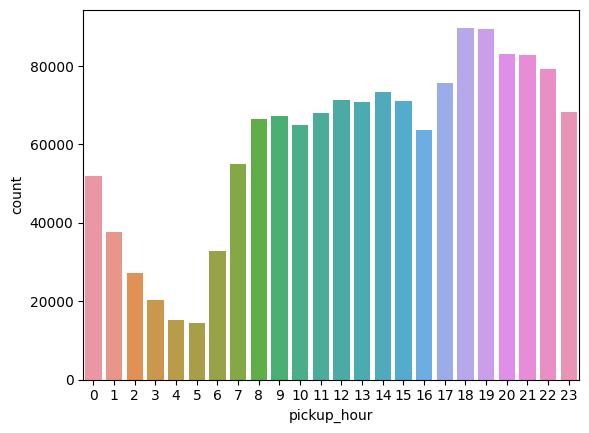

In [20]:
sns.countplot(data=data,x='pickup_hour')


<Axes: xlabel='pickup_weekday', ylabel='count'>

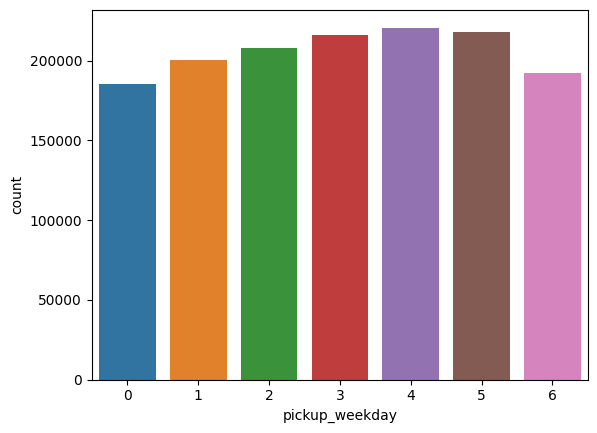

In [22]:
sns.countplot(data=data,x='pickup_weekday')

<Axes: xlabel='pickup_month', ylabel='count'>

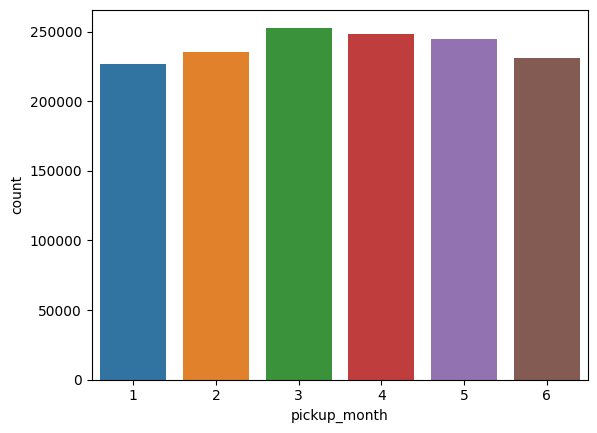

In [25]:
data['pickup_month'] = data['pickup_datetime'].dt.month

sns.countplot(data=data,x='pickup_month')

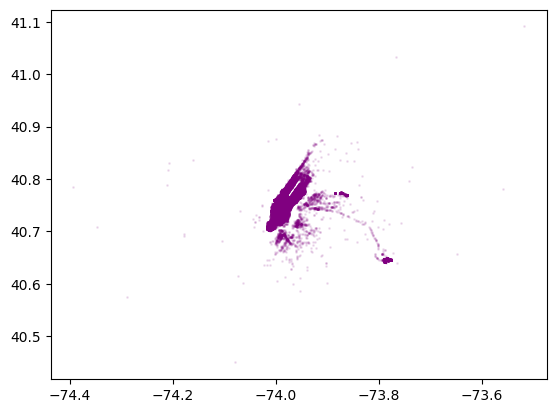

In [5]:
# The southernmost point is at around 40.4774 degrees North.
# The northernmost point is at around 40.9176 degrees North.
# Longitude:

# The westernmost point is at around -74.2591 degrees West.
# The easternmost point is at around -73.7004 degrees West.




city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

plt.scatter(data['pickup_longitude'].values[:50000], data['pickup_latitude'].values[:50000],
              color='purple', s=1, label='train', alpha=0.1)
plt.show()

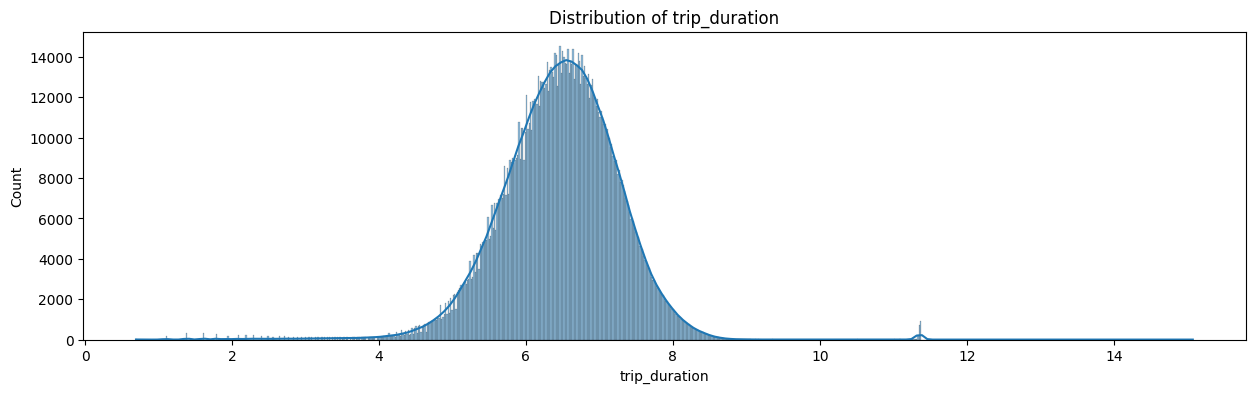

In [6]:
fig,ax = plt.subplots(1,1,figsize=(15,4))

hist1 = sns.histplot(data = data, x=np.log(1+data['trip_duration']),ax=ax,kde=True)
hist1.set(title='Distribution of trip_duration')
fig.show()

In [7]:
data = data.loc[(data['pickup_latitude'] >= 40.637044) & (data['pickup_latitude'] <= 40.855256)]
data = data.loc[(data['pickup_longitude'] >= -74.035735) & (data['pickup_longitude'] <= -73.770272)]
data = data.loc[(data['dropoff_latitude'] >= 40.637044) & (data['dropoff_latitude'] <= 40.855256)]
data = data.loc[(data['dropoff_longitude'] >= -74.035735) & (data['dropoff_longitude'] <= -73.770272)]
data.shape

(1440092, 23)

In [8]:
# Assuming df is your DataFrame
pickup_locations = data.groupby(['pickup_longitude', 'pickup_latitude']).size().reset_index(name='pickup_count')

# Sort by pickup_count in descending order to get the most frequent locations
most_frequent_pickup_locations = pickup_locations.sort_values(by='pickup_count', ascending=False)

# Display the top N most frequent pickup locations
top_n = 5  # You can adjust this based on your preference
print(f"Top {top_n} Most Frequent Pickup Locations:")
print(most_frequent_pickup_locations.head(top_n)[[ 'pickup_latitude', 'pickup_longitude','pickup_count']])

Top 5 Most Frequent Pickup Locations:
         pickup_latitude  pickup_longitude  pickup_count
1206660        40.821003        -73.954666            39
1325327        40.773762        -73.870872            14
1325321        40.773739        -73.870872            14
1324871        40.773788        -73.870934            14
1320649        40.774181        -73.873009            14


In [9]:
# Assuming df is your DataFrame
dropoff_locations = data.groupby(['dropoff_longitude', 'dropoff_latitude']).size().reset_index(name='dropoff_count')

# Sort by pickup_count in descending order to get the most frequent locations
most_frequent_drop_locations = dropoff_locations.sort_values(by='dropoff_count', ascending=False)

# Display the top N most frequent pickup locations
top_n = 5  # You can adjust this based on your preference
print(f"Top {top_n} Most Frequent dropoff Locations:")
print(most_frequent_drop_locations.head(top_n)[[ 'dropoff_latitude', 'dropoff_longitude','dropoff_count']])

Top 5 Most Frequent dropoff Locations:
         dropoff_latitude  dropoff_longitude  dropoff_count
1181545         40.821003         -73.954666             39
261345          40.750389         -73.994682             10
137663          40.760578         -74.002769             10
137656          40.760551         -74.002769              9
261876          40.750408         -73.994659              8


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Top 5 Most Common Pickup Clusters:
   index  pickup_count
0      3        693527
1      0        672289
2      2         44044
3      1         30232


Text(0.5, 1.0, 'Pickup Clusters')

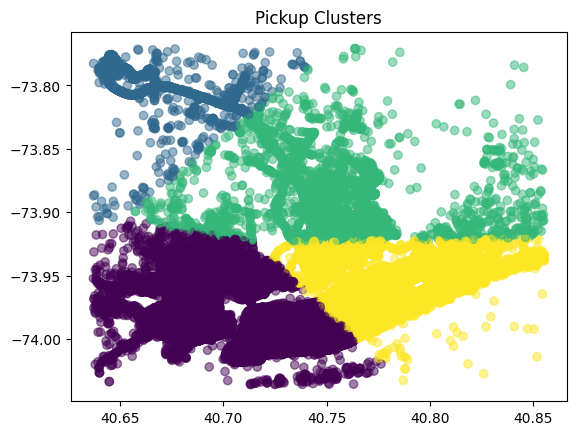

In [10]:
df=data.iloc[:,:]

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
pickup_locations = df[['pickup_longitude', 'pickup_latitude']]

# Define the number of clusters (adjust as needed)
num_clusters = 4

# Fit K-means clustering model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['pickup_cluster'] = kmeans.fit_predict(pickup_locations)

# Count the occurrences of each cluster
cluster_counts = df['pickup_cluster'].value_counts().reset_index(name='pickup_count')

# Display the most common pickup clusters
top_n = 5  # You can adjust this based on your preference
print(f"Top {top_n} Most Common Pickup Clusters:")
print(cluster_counts.head(top_n))

# Optionally, visualize the clusters on a scatter plot
plt.scatter(df['pickup_latitude'], df['pickup_longitude'], c=df['pickup_cluster'], cmap='viridis', alpha=0.5)
plt.title('Pickup Clusters')

In [11]:
most_common_pickup_locations_per_cluster = df.groupby('pickup_cluster')[['pickup_latitude', 'pickup_longitude']].agg(lambda x: x.value_counts().index[0]).reset_index()

# Display the most common pickup locations within each cluster
print("Most Common Pickup Locations Within Each Cluster:")
print(most_common_pickup_locations_per_cluster)

Most Common Pickup Locations Within Each Cluster:
   pickup_cluster  pickup_latitude  pickup_longitude
0               0        40.750069        -73.994102
1               1        40.644711        -73.776749
2               2        40.774101        -73.873032
3               3        40.764172        -73.982201


In [12]:
!pip install folium

In [15]:
import folium


avg_latitude = df['pickup_latitude'].mean()
avg_longitude = df['pickup_longitude'].mean()
pickup_map = folium.Map(location=[avg_latitude, avg_longitude], zoom_start=12)
for index, row in most_common_pickup_locations_per_cluster.iterrows():
    folium.Marker([row['pickup_latitude'], row['pickup_longitude']],
                  popup=f"Cluster: {row['pickup_cluster']}",
                  icon=folium.Icon(color='blue')).add_to(pickup_map)

# Display the map
pickup_map
